# Supervised Learning Coursework Assignment 1: PART I

## **Section 1.1** : Linear Regression

### Question 1

In [1]:
#Importing libraries    
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
#Create datapoints array and reshape into (4x1) vectors
x = np.array([1, 2, 3, 4]).reshape(4, 1)
y = np.array([3, 2, 0, 5]).reshape(4, 1)

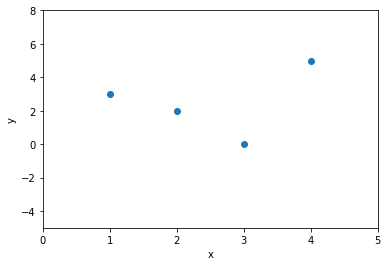

In [3]:
#Visualize datapoints
plt.scatter(x, y)
plt.xlim(0, 5)
plt.ylim(-5, 8)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#### (a) Plotting different polynomial fits to data

In [4]:
#Computes the polynomial basis
def phi(x, k):
  """ Computes a single basis function $x^{k-1}$, given an input vector x of shape (m, 1) and the value k. m is the number of training examples """
  return x**(k-1)

#This function creates the feature map PHI()
def PHI(x, k):
  """ Creates the feature map, which is a matrix of shape (m, k). Each column is the kth basis function applied on 
  the input vector x of shape (m, 1). m is the number of training examples """

  #Number of training examples
  m = x.shape[0]

  #Initialize a feature map of shape (m, k) with 0s in it.
  feature_map = np.zeros((m, k))

  #In every column, replace the zeros with the basis function k computed on input vector x
  for i in range(0, k):
    feature_map[:, i] = phi(x.squeeze(), i+1)

  return feature_map

In [5]:
#Compute transformed feature maps for k = {1,...,4} 
x_tr_k1 = PHI(x, k=1)
x_tr_k2 = PHI(x, k=2)
x_tr_k3 = PHI(x, k=3)
x_tr_k4 = PHI(x, k=4)

#Check mapping for k=3. Should be a (4, 3) matrix.
print("Transformed dataset for k = {}:\n".format(3))
print(x_tr_k3)

Transformed dataset for k = 3:

[[ 1.  1.  1.]
 [ 1.  2.  4.]
 [ 1.  3.  9.]
 [ 1.  4. 16.]]


In [6]:
#Compute weights for the transformed data using least squares regression formula above
w_k1 = np.linalg.inv(x_tr_k1.T @ x_tr_k1) @ x_tr_k1.T @ y
w_k2 = np.linalg.inv(x_tr_k2.T @ x_tr_k2) @ x_tr_k2.T @ y
w_k3 = np.linalg.inv(x_tr_k3.T @ x_tr_k3) @ x_tr_k3.T @ y
w_k4 = np.linalg.inv(x_tr_k4.T @ x_tr_k4) @ x_tr_k4.T @ y

#Check weights for k=3. Should be a (k, 1) vector.
print("Weights k = {}\n".format(3))
print(w_k3)

Weights k = 3

[[ 9. ]
 [-7.1]
 [ 1.5]]


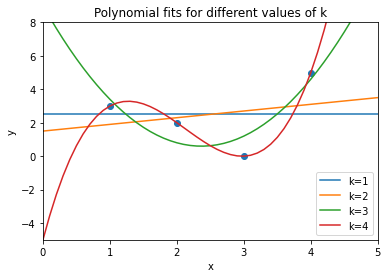

In [7]:
#Plot curves by selecting a set of points between 0 and 10
X = np.arange(0, 10, 0.1).reshape(-1, 1)
Y_k1 = PHI(X, k=1) @ w_k1
Y_k2 = PHI(X, k=2) @ w_k2
Y_k3 = PHI(X, k=3) @ w_k3
Y_k4 = PHI(X, k=4) @ w_k4

#Plot the original data points
plt.scatter(x, y)

#Plot curves
plt.plot(X, Y_k1)
plt.plot(X, Y_k2)
plt.plot(X, Y_k3)
plt.plot(X, Y_k4)

#Extra steps to make the graph well formatted
plt.xlim(0, 5)
plt.ylim(-5, 8)
plt.legend(['k=1', 'k=2', 'k=3', 'k=4'])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial fits for different values of k')
#Save results
plt.savefig('polyfit.png')
plt.show()

#### (b) Define equations for varied polynomial dimensions

In [8]:
#Print the weights that we computed earlier for k=1,...,4. Should be (k, 1) vectors for dimension of polynomial basis we are dealing with
print("Weights for k=1 :\n ", w_k1, "\n")
print("Weights for k=2 :\n ", w_k2, "\n")
print("Weights for k=3 :\n ", w_k3, "\n")
print("Weights for k=4 :\n ", w_k4)

Weights for k=1 :
  [[2.5]] 

Weights for k=2 :
  [[1.5]
 [0.4]] 

Weights for k=3 :
  [[ 9. ]
 [-7.1]
 [ 1.5]] 

Weights for k=4 :
  [[-5.        ]
 [15.16666667]
 [-8.5       ]
 [ 1.33333333]]


Equations for the polynomial models:

For $k = 1 : y = 2.5$

For $k = 2 : y = 1.5 + 0.4x$

For $k = 3 : y = 9.0 - 7.1x + 1.5x^2$

For $k = 4 : y = -5.0 + 15.17x -8.5x^2 + 1.33x^3$


#### (c) Compute MSE for different polynomial equations

In [9]:
def MSE(x_values, y_values, weights):
  """ 
  Computes the MSE given the x_values matrix (m, n), y_values vector of shape (m, 1) and weights vector of shape (n, 1). 
  m is the number of training examples, n is the number of input features.
  """
  m = x_values.shape[0]
  SSE = ((x_values @ weights) - y_values).T @ ((x_values @ weights) - y_values)
  MSE = SSE / m
  return MSE

In [10]:
#Print MSE values for each of the polynomial bases
print("MSE for k = 1 : " + str(MSE(x_tr_k1, y, w_k1).item()))
print("MSE for k = 2 : " + str(MSE(x_tr_k2, y, w_k2).item()))
print("MSE for k = 3 : " + str(MSE(x_tr_k3, y, w_k3).item()))
print("MSE for k = 4 : " + str(MSE(x_tr_k4, y, w_k4).item()))

MSE for k = 1 : 3.25
MSE for k = 2 : 3.05
MSE for k = 3 : 0.7999999999999996
MSE for k = 4 : 3.4942940895563015e-23


### Question 2

>$$g_\sigma(x) := \sin^2(2 \pi x) + \epsilon$$

#### (a) 

##### (i) Plot data created from random function

In [11]:
def g_sigma(x, sigma):
  """
  Random function of form g_sigma(x) = sin^2(2*pi*x) + epsilon where epsilon is a Gaussian distributed random variable 
  with mean 0 and sigma^2 variance. 
  
  Takes an input x and returns the value g_sigma(x) with an added noise value 
  generated from epsilon. 
  """

  #Compute function on the point x
  function = np.square(np.sin(2 * np.pi * x))
  #Generate a single noise value for that point x
  noise = np.random.normal(0.0, sigma)
  
  return function + noise

In [12]:
def generate_data(interval, size, sigma):
  """
  Generates a random sample {(x_1, g_1),...,(x_m, g_m)}. First samples a single x value from the interval
  and then computes g_sigma = sin^2(2pi*x) + epsilon, where epsilon is random gaussian noise.

  Args
  ----
  interval - tuple of (lower_bound, upper_bound)
  size - number of points to generate
  sigma - standard deviation of the noise

  Returns
  -------
  NumPy arrays of the generated input and output data
  """
  
  #This will store the x_values and g_sigma(x) values
  x_values = []
  g_values = []

  for i in range(size):
    
    #Generate a single point
    x = np.random.uniform(interval[0], interval[1])
    #Create the output value using the random function
    g = g_sigma(x, sigma=sigma)
    #Append the values to the list
    x_values.append(x)
    g_values.append(g)

  return np.array(x_values), np.array(g_values)

In [13]:
#Generate training data - set a seed for ensuring reproducible results
np.random.seed(1)
x_train, g_train = generate_data(interval=(0, 1), size=30, sigma=0.07)

print("x_train shape: ", x_train.shape)
print("g_train shape: ", g_train.shape)

x_train shape:  (30,)
g_train shape:  (30,)


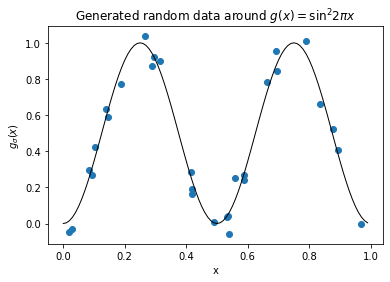

In [14]:
#Plotting deterministic function (sin^2(2*pi*x) without the random noise)
x = np.arange(0, 1, 0.01)
y = np.sin(2 * np.pi * x)**2

#Plotting generated data
plt.scatter(x_train, g_train)

#Plot the function curve
plt.plot(x, y, color='black', linewidth=1)

#Extra steps for formatting image
plt.xlabel('x')
plt.ylabel('$g_\sigma(x)$')
plt.title("Generated random data around $g(x) = \sin^2{2 \pi x}$")
plt.savefig('random_data.png')
plt.show()

##### (ii) Fit data with different dimensions of polynomial bases $k = 2, 5, 10, 14, 18$

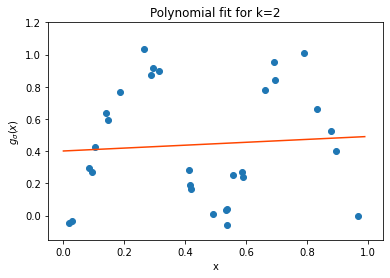

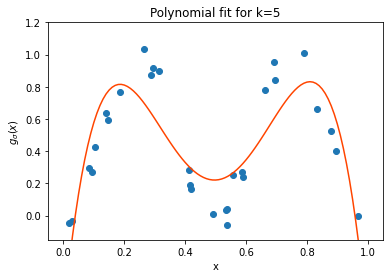

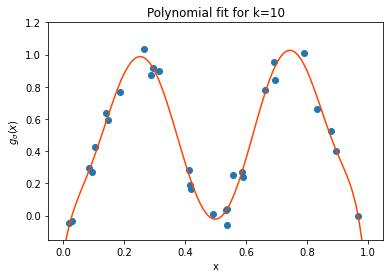

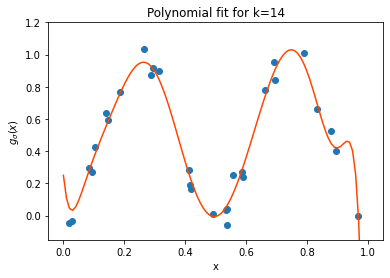

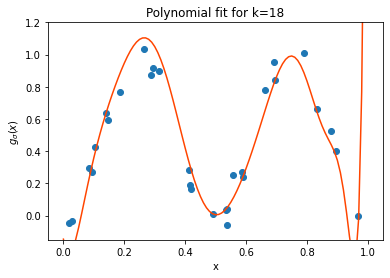

In [15]:
#Stores the values of polynomial basis dimensions
k_values = [2, 5, 10, 14, 18]

#Iterate over each k
for i in range(len(k_values)):

  #Create a new figure
  plt.figure()

  #Plot the original data points
  plt.scatter(x_train, g_train)

  #Compute feature maps and weights
  x_transformed = PHI(x_train, k_values[i])

  #Computing the weights using least squares regression. In case we encounter singular matrices, I've added the psuedoinverse as backup
  try:
    w = np.linalg.inv(x_transformed.T @ x_transformed) @ x_transformed.T @ g_train
  except np.linalg.LinAlgError:
    w = np.linalg.pinv(x_transformed.T @ x_transformed) @ x_transformed.T @ g_train

  #Select a set of points between 0 and 1 for plotting the fitted curve
  X = np.arange(0, 1, 0.01).reshape(-1, 1)
  #Create the feature map and compute the function values
  Y = PHI(X, k_values[i]) @ w

  #Plot fitted curve
  plt.plot(X, Y, color='orangered')

  #Extra steps for formatting the plot
  plt.xlim(-0.05, 1.05)
  plt.ylim(-0.15, 1.20)
  plt.xlabel('x')
  plt.ylabel('$g_\sigma(x)$')
  plt.title('Polynomial fit for k={}'.format(k_values[i]))
  plt.savefig('fitted_curves_k={}.png'.format(k_values[i]))
  plt.show()

#### (b) Plot log train MSE over $k = 1,\cdots,18$

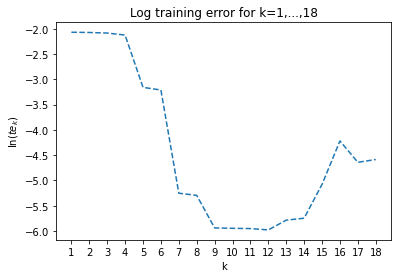

In [16]:
#Store the different polynomial bases dimensions from 1,...,18
k = np.arange(1, 19)

#This will store the training error i.e the MSE values of fitting the dataset with the polynomial basis of dimension k
te_k = np.zeros(len(k))

#This will store the weights for the different polynomial bases
w_k = []

#Iterate over each k
for i in range(len(k)):

  #Compute feature map from x
  x_transformed = PHI(x_train, k[i])

  #Compute weights using least squares regression - in case we encounter singular matrices, I've added the pseudoinverse as backup
  try:
    w = np.linalg.inv(x_transformed.T @ x_transformed) @ x_transformed.T @ g_train
  except np.linalg.LinAlgError:
    w = np.linalg.pinv(x_transformed.T @ x_transformed) @ x_transformed.T @ g_train

  #Append to list of weights
  w_k.append(w)

  #Compute training error
  te_k[i] = MSE(x_transformed, g_train, w)
 
#Plot log training error
plt.figure()
plt.plot(k, np.log(te_k), linestyle='--')

#Extra plot formatting steps
plt.title('Log training error for k=1,...,18')
plt.xlabel('k')
plt.ylabel('$\ln(te_k)$')
plt.xticks(ticks=k)
plt.savefig('logte_k.png')
plt.show()

#### (c) Generate test set and compute test MSE for $k = 1,...,18$

In [17]:
#Generate test set of 1000 points using the previous data generator function
np.random.seed(100)
x_test, g_test = generate_data(interval=(0, 1), size=1000, sigma=0.07)

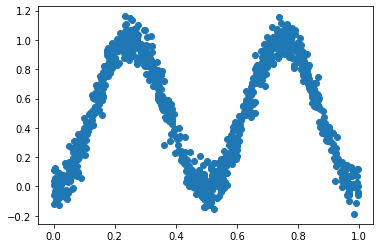

In [18]:
#Visualize data points
plt.figure()
plt.scatter(x_test, g_test)
plt.show()

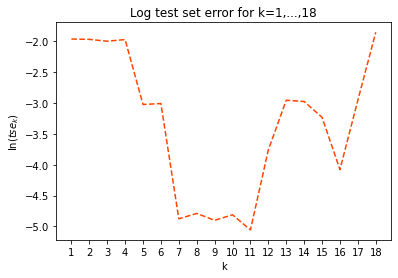

In [19]:
#Store the polynomial bases of k=1,...,18
k = np.arange(1, 19)

#This array will store the test set error for k=1,...,18
tse_k = np.zeros(len(k))

#Iterate over each k
for i in range(len(k)):
  #Compute feature map for test points
  x_test_transformed = PHI(x_test, k[i])

  #Compute the test set error using the weights created using the training set
  tse_k[i] = MSE(x_test_transformed, g_test, w_k[i])

#Plot log test set error
plt.figure()
plt.plot(k, np.log(tse_k), linestyle='--', color='orangered')

#Extra steps for plot formatting
plt.title('Log test set error for k=1,...,18')
plt.xlabel('k')
plt.ylabel('ln($tse_k$)')
plt.xticks(ticks=k)
plt.savefig("logtse_k.png")
plt.show()

#### (d) Repeat (b) and (c) over 100 runs.

In [20]:
#For reproducible results
np.random.seed(10)

#Set the values for runs and the number of k values
runs = 100
k = 18

#These are matrices of shape (100, 18) which will store the training error and test error
te_k = np.zeros((runs, k))
tse_k = np.zeros((runs, k))

for i in range(runs):

  #Generate new training set
  x_train, g_train = generate_data(interval=(0, 1), size=30, sigma=0.07)

  #Generate new test set
  x_test, g_test = generate_data(interval=(0, 1), size=1000, sigma=0.07)

  #Iterate over k values
  for j in range(k):
    #Create feature maps for training and testing data
    x_train_transformed = PHI(x_train, k=j+1)
    x_test_transformed = PHI(x_test, k=j+1)
    
    #Computing weights from training data. In case we encounter singular matrices, I've kept the psuedoinverse as backup
    try:
      w = np.linalg.inv(x_train_transformed.T @ x_train_transformed) @ x_train_transformed.T @ g_train
    except np.linalg.LinAlgError:
      w = np.linalg.pinv(x_train_transformed.T @ x_train_transformed) @ x_train_transformed.T @ g_train

    #Compute training error and save value in the matrix
    te_k[i, j] = MSE(x_train_transformed, g_train, w) 
    #Compute testing error and save value in the matrix
    tse_k[i, j] = MSE(x_test_transformed, g_test, w)

  print(">> Run {} Completed!".format(i+1))

>> Run 1 Completed!
>> Run 2 Completed!
>> Run 3 Completed!
>> Run 4 Completed!
>> Run 5 Completed!
>> Run 6 Completed!
>> Run 7 Completed!
>> Run 8 Completed!
>> Run 9 Completed!
>> Run 10 Completed!
>> Run 11 Completed!
>> Run 12 Completed!
>> Run 13 Completed!
>> Run 14 Completed!
>> Run 15 Completed!
>> Run 16 Completed!
>> Run 17 Completed!
>> Run 18 Completed!
>> Run 19 Completed!
>> Run 20 Completed!
>> Run 21 Completed!
>> Run 22 Completed!
>> Run 23 Completed!
>> Run 24 Completed!
>> Run 25 Completed!
>> Run 26 Completed!
>> Run 27 Completed!
>> Run 28 Completed!
>> Run 29 Completed!
>> Run 30 Completed!
>> Run 31 Completed!
>> Run 32 Completed!
>> Run 33 Completed!
>> Run 34 Completed!
>> Run 35 Completed!
>> Run 36 Completed!
>> Run 37 Completed!
>> Run 38 Completed!
>> Run 39 Completed!
>> Run 40 Completed!
>> Run 41 Completed!
>> Run 42 Completed!
>> Run 43 Completed!
>> Run 44 Completed!
>> Run 45 Completed!
>> Run 46 Completed!
>> Run 47 Completed!
>> Run 48 Completed!
>

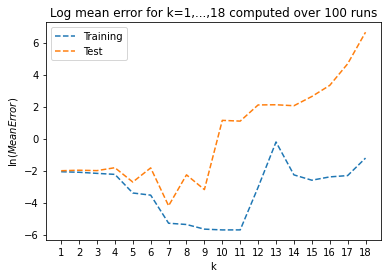

In [21]:
#Calculate the mean of the training and test set error
k_values = np.arange(1, k+1)
te_average = np.mean(te_k, axis=0)
tse_average = np.mean(tse_k, axis=0)

#Plot log of average training and test set error
plt.figure()
plt.plot(k_values, np.log(te_average), linestyle='--')
plt.plot(k_values, np.log(tse_average), linestyle='--')
#Extra steps for plot formatting
plt.xlabel('k')
plt.ylabel('$\ln(Mean Error)$')
plt.legend(['Training', 'Test'])
plt.xticks(ticks=k_values)
plt.title('Log mean error for k=1,...,18 computed over {} runs'.format(runs))
plt.savefig('100runs.png')
plt.show()

### Question 3: Repeat experiments for 2(b-d) with new basis.

The new basis is defined as follows: $$\{\sin(1\pi x), \sin(2\pi x), \sin(3\pi x),...,\sin(k\pi x)\}$$

In [22]:
#Computes the basis function
def phi_v2(x, k):
  """ Computes a single basis function, given input vector x of shape (m, 1) and value k. m is the number of training examples """
  return np.sin(k*np.pi*x)

#This function creates the feature map
def PHI_v2(x, k):
  """ Creates the feature map, which is a matrix of shape (m, k). Each column is the kth basis function applied on 
  the input vector x of shape (m, 1). m is the number of training examples """

  #Extract the number of training examples
  m = x.shape[0]
  
  #Initialize feature map matrix to matrix of zeros
  feature_map = np.zeros((m, k))

  #Iterative over each column
  for i in range(0, k):
    #For each column of the feature map matrix, replace the 0s with the computed kth basis function values
    feature_map[:, i] = phi_v2(x.squeeze(), i+1)
  return feature_map

In [23]:
#Generate new training data
np.random.seed(2)
x_train, g_train = generate_data(interval=(0, 1), size=30, sigma=0.07)

print("x_train shape: ", x_train.shape)
print("g_train shape: ", g_train.shape)

x_train shape:  (30,)
g_train shape:  (30,)


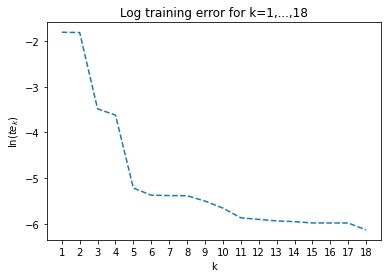

In [24]:
#Store an array of all the k values from 1,...,18
k = np.arange(1, 19)

#This array will store the training error i.e the MSE values of fitting the dataset with the polynomial basis of dimension k
te_k = np.zeros(len(k))

#This will store the weights computed over the training set for the different k's 
w_k = []

#Iterate over each k
for i in range(len(k)):

  #Compute feature map for training set
  x_transformed = PHI_v2(x_train, k[i])

  #Compute weights using least squares regression - in case we encounter singular matrices, I've used the psuedoinverse as backup
  try:
    w = np.linalg.inv(x_transformed.T @ x_transformed) @ x_transformed.T @ g_train
  except np.linalg.LinAlgError:
    w = np.linalg.pinv(x_transformed.T @ x_transformed) @ x_transformed.T @ g_train

  #Append to list of weights
  w_k.append(w)

  #Compute training error
  te_k[i] = MSE(x_transformed, g_train, w)
 
#Plot log training error vs k
plt.figure()
plt.title('Log training error for k=1,...,18')
plt.plot(k, np.log(te_k), linestyle='--')

#Extra steps for plot formatting
plt.xlabel('k')
plt.ylabel('$\ln(te_k)$')
plt.xticks(ticks=k)
plt.savefig('new_basis_logte_k.png')
plt.show()

In [25]:
#Generate test set of 1000 points
np.random.seed(20)
x_test, g_test = generate_data(interval=(0, 1), size=1000, sigma=0.07)

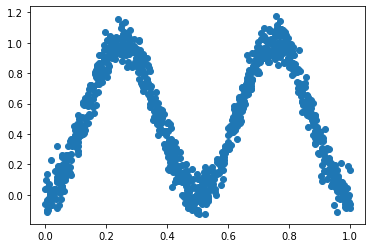

In [26]:
#Visualize test data points
plt.figure()
plt.scatter(x_test, g_test)
plt.show()

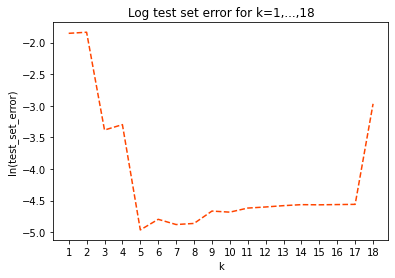

In [27]:
#Store an array of the k values
k = np.arange(1, 19)

#This array will store the test set errors over each k
tse_k = np.zeros(len(k))

#Iterate over each k
for i in range(len(k)):
  #Compute feature map for the test points
  x_test_transformed = PHI_v2(x_test, k[i])
  #Compute test set error using the weights computed using the training set
  tse_k[i] = MSE(x_test_transformed, g_test, w_k[i])

#Plot results
plt.figure()
plt.title('Log test set error for k=1,...,18')
plt.plot(k, np.log(tse_k), linestyle='--', color='orangered')
#Extra steps for plot formatting
plt.xlabel('k')
plt.ylabel('ln(test_set_error)')
plt.xticks(ticks=k)
plt.savefig('new_basis_logtse_k.png')
plt.show()

In [28]:
#For ensuring reproducibility of results
np.random.seed(13)

#Store value for number of runs and the k
runs = 100
k = 18

#These matrices will store the training and test set error over each run for every k value
te_k = np.zeros((runs, k))
tse_k = np.zeros((runs, k))

#Iterate over the runs
for i in range(runs):

  #Generate new training set
  x_train, g_train = generate_data(interval=(0, 1), size=30, sigma=0.07)

  #Generate new test set
  x_test, g_test = generate_data(interval=(0, 1), size=1000, sigma=0.07)

  #Iterate over k
  for j in range(k):

    #Create feature maps for training and testing data
    x_train_transformed = PHI_v2(x_train, k=j+1)
    x_test_transformed = PHI_v2(x_test, k=j+1)

    #Compute weights on training data - In case we encounter singular matrices, I've used the pseudoinverse as backup
    try:
      w = np.linalg.inv(x_train_transformed.T @ x_train_transformed) @ x_train_transformed.T @ g_train
    except np.linalg.LinAlgError:
      w = np.linalg.pinv(x_train_transformed.T @ x_train_transformed) @ x_train_transformed.T @ g_train

    #Compute training error and save to results matrix
    te_k[i, j] = MSE(x_train_transformed, g_train, w) 
    #Compute testing error and save to results matrix
    tse_k[i, j] = MSE(x_test_transformed, g_test, w)

  print(">> Run {} Completed!".format(i+1))

>> Run 1 Completed!
>> Run 2 Completed!
>> Run 3 Completed!
>> Run 4 Completed!
>> Run 5 Completed!
>> Run 6 Completed!
>> Run 7 Completed!
>> Run 8 Completed!
>> Run 9 Completed!
>> Run 10 Completed!
>> Run 11 Completed!
>> Run 12 Completed!
>> Run 13 Completed!
>> Run 14 Completed!
>> Run 15 Completed!
>> Run 16 Completed!
>> Run 17 Completed!
>> Run 18 Completed!
>> Run 19 Completed!
>> Run 20 Completed!
>> Run 21 Completed!
>> Run 22 Completed!
>> Run 23 Completed!
>> Run 24 Completed!
>> Run 25 Completed!
>> Run 26 Completed!
>> Run 27 Completed!
>> Run 28 Completed!
>> Run 29 Completed!
>> Run 30 Completed!
>> Run 31 Completed!
>> Run 32 Completed!
>> Run 33 Completed!
>> Run 34 Completed!
>> Run 35 Completed!
>> Run 36 Completed!
>> Run 37 Completed!
>> Run 38 Completed!
>> Run 39 Completed!
>> Run 40 Completed!
>> Run 41 Completed!
>> Run 42 Completed!
>> Run 43 Completed!
>> Run 44 Completed!
>> Run 45 Completed!
>> Run 46 Completed!
>> Run 47 Completed!
>> Run 48 Completed!
>

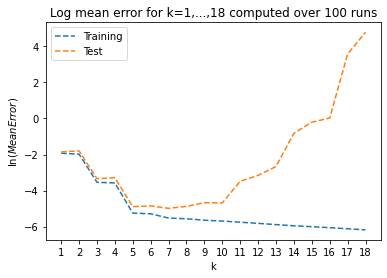

In [29]:
#Calculate mean of the train and test set error over the 100 runs
k_values = np.arange(1, k+1)
te_average = np.mean(te_k, axis=0)
tse_average = np.mean(tse_k, axis=0)

#Plot results
plt.figure()
plt.plot(k_values, np.log(te_average), linestyle='--')
plt.plot(k_values, np.log(tse_average), linestyle='--')

#Extra steps for plot formatting
plt.xlabel('k')
plt.ylabel('$\ln(Mean Error)$')
plt.legend(['Training', 'Test'])
plt.xticks(ticks=k_values)
plt.title('Log mean error for k=1,...,18 computed over {} runs'.format(runs))
plt.savefig('new_basis_100runs.png')
plt.show()

## **Section 1.2** : Filtered Boston Housing and Kernels

### Question 4

In [30]:
import pandas as pd

In [31]:
#Load and inspect the Boston housing dataset
dataframe = pd.read_csv("http://www0.cs.ucl.ac.uk/staff/M.Herbster/boston-filter/Boston-filtered.csv")
attributes = list(dataframe.columns)
dataframe.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [32]:
#Function to add ones to the training set as a way to account for the bias term in the weights
def add_bias(data):
  """ 
  Adds a column of ones into the dataset in order to account for the bias term. 
  
  Args
  ----
  data : a NumPy array of the input data. Can be a matrix of shape (m, n) or a single input vector x_i of shape (m, 1). m is the number of training examples
  while n is the number of input features.

  Returns
  -------
  data_with_bias : a NumPy array of data with 1s added. If data is a matrix, then a column os 1s is added to the first column. 
  If data is a single vector x_i, then the first element of x_i is 1.
  """

  #If the data is a vector
  if data.shape[1] == 1:
    #Create a one
    ones = np.ones((data.shape[1], ))
    #Insert 1 as the first value for the vector
    data_with_bias = np.insert(data, 0, ones, axis=0)

  #If data is a matrix
  else:
    #Create a vector ones
    ones = np.ones((data.shape[0], ))
    #Stack this vector of ones to the beginning of the matrix
    data_with_bias = np.insert(data, 0, ones, axis=1)

  return data_with_bias

In [33]:
#Convert the pandas dataframe into matrix
data = dataframe.values

#Add a column of 1's to the data matrix to account for bias term
data_with_bias = add_bias(data)

#Split the data matrix into a matrix of the inputs and the vector of outputs
X = data_with_bias[:, :13]
Y = data_with_bias[:, 13].reshape(-1, 1)

print("Size of dataset : {}".format(X.shape[0]))
print("Number of input features : {}\n".format(X.shape[1] - 1))
print("Shape of X (inputs with bias included) : {}".format(X.shape))
print("Shape of Y (targets): {}".format(Y.shape))

Size of dataset : 506
Number of input features : 12

Shape of X (inputs with bias included) : (506, 13)
Shape of Y (targets): (506, 1)


In [34]:
def split_data(inputs, targets, test_proportion, shuffle=None):
  """
  Splits the data into training and test sets.

  Args
  ----
  inputs : NumPy array of input data. Should be of shape (# examples, # features)
  targets : NumPy array of target data. Should be of shape (# examples, 1)
  test_proportion : Value between 0 and 1 which specifies how much of the data to use for testing.
  shuffle : Optional. Set to True if you want the data shuffled and then split.
  seed : Optional. Set for reproducible results.

  Returns
  -------
  train_X : NumPy array of training examples. Should be of shape (# examples, # features)
  train_Y : NumPy array of training targets. Should be of shape (# examples, 1)
  test_X : NumPy array of testing examples. Should be of shape (# examples, # features)
  test_Y : NumPy array of testing targets. Should be of shape (# examples, 1)
  """
  
  #Stores the number of data points
  nData = inputs.shape[0]

  # Shuffle data
  if shuffle:
    #Generate a shuffled version of the array indices
    shuffled_indices = np.random.permutation(nData)
    #Shuffle the inputs as per in the array of shuffled indices
    shuffled_inputs = inputs[shuffled_indices, :]
    shuffled_targets = targets[shuffled_indices, :]
  else:
    #If shuffle is set to False then we just work with the data in its original order
    shuffled_inputs = inputs
    shuffled_targets = targets

  # Calculate the split index based on the specified proportions
  split_index = int((1 - test_proportion) * nData)

  # Select the examples up to the split index to be used as training set
  train_X = shuffled_inputs[:split_index]
  train_Y = shuffled_targets[:split_index]
  # Select the examples from the split index onwards to be used as the test set
  test_X = shuffled_inputs[split_index:]
  test_Y = shuffled_targets[split_index:]

  return train_X, train_Y, test_X, test_Y

#### (a) Performing Naive Regression

**Over a single run**

This was just to test over a single run. As we are meant to perform regression over 20 runs, please skip to 20 runs implementation that comes next.

In [35]:
#Split the data into training and test sets. For reproducibility of results I've set a seed
np.random.seed(100000)
X_train, Y_train, X_test, Y_test = split_data(inputs=X, targets=Y, test_proportion=1/3, shuffle=True)

print("Train X shape = {}".format(X_train.shape))
print("Train Y shape = {}".format(Y_train.shape))
print("Test X shape = {}".format(X_test.shape))
print("Test Y shape = {}".format(Y_test.shape))

Train X shape = (337, 13)
Train Y shape = (337, 1)
Test X shape = (169, 13)
Test Y shape = (169, 1)


In [36]:
#Create vector of ones for training and test set
train_ones = np.ones((X_train.shape[0], 1))
test_ones = np.ones((X_test.shape[0], 1))

#Perform Naive regression on training set
w_naive = np.linalg.inv(train_ones.T @ train_ones) @ train_ones.T @ Y_train

#Calculate train MSE and test MSE
train_error = MSE(train_ones, Y_train, w_naive)
test_error = MSE(test_ones, Y_test, w_naive)

#The w_naive values is pretty much the same as the mean of the training output values. I have confirmed this by printing the mean of the
#Y_train.
print("w_naive value = {}".format(w_naive))
print("Mean of Y_train values = {}".format(np.mean(Y_train)), '\n')
print("Train MSE: {}".format(train_error.item()))
print("Test MSE: {}".format(test_error.item()))

w_naive value = [[23.11780415]]
Mean of Y_train values = 23.11780415430267 

Train MSE: 88.34864443642192
Test MSE: 77.60927103774101


**Over 20 runs:**

In [37]:
#For reproducibility of results
np.random.seed(101010)

#Stores the number of runs
runs = 20

#These will store the total train and test MSE over the 20 runs
train_MSE = 0
test_MSE = 0

#Iterate over runs
for i in range(runs):

  #Generate samples
  xtrain, ytrain, xtest, ytest = split_data(inputs=X, targets=Y, test_proportion=1/3, shuffle=True)

  train_ones = np.ones((xtrain.shape[0], 1))
  test_ones = np.ones((xtest.shape[0], 1))

  #Perform Naive Regression
  w_naive = np.linalg.inv(train_ones.T @ train_ones) @ train_ones.T @ ytrain

  #Calculate and aggregate train and test MSE
  train_MSE += MSE(train_ones, ytrain, w_naive) 
  test_MSE += MSE(test_ones, ytest, w_naive)

  print(">> Run {} Completed.".format(i+1))

print("Average Train MSE (Computed over {} runs) = {}".format(runs, train_MSE.item()/runs))
print("Average Test MSE (Computed over {} runs) = {}".format(runs, test_MSE.item()/runs))

>> Run 1 Completed.
>> Run 2 Completed.
>> Run 3 Completed.
>> Run 4 Completed.
>> Run 5 Completed.
>> Run 6 Completed.
>> Run 7 Completed.
>> Run 8 Completed.
>> Run 9 Completed.
>> Run 10 Completed.
>> Run 11 Completed.
>> Run 12 Completed.
>> Run 13 Completed.
>> Run 14 Completed.
>> Run 15 Completed.
>> Run 16 Completed.
>> Run 17 Completed.
>> Run 18 Completed.
>> Run 19 Completed.
>> Run 20 Completed.
Average Train MSE (Computed over 20 runs) = 86.05624289198637
Average Test MSE (Computed over 20 runs) = 81.51650453132757


#### (c) Linear Regression with single attributes

**Over a single run**

This was just to test over a single run. As we are meant to perform regression over 20 runs, please skip to 20 runs implementation that comes next.

In [38]:
#Split the data into training and test sets. For reproducibility of results I've set a seed
np.random.seed(100000)
X_train, Y_train, X_test, Y_test = split_data(inputs=X, targets=Y, test_proportion=1/3, shuffle=True)

print("Train X shape = {}".format(X_train.shape))
print("Train Y shape = {}".format(Y_train.shape))
print("Test X shape = {}".format(X_test.shape))
print("Test Y shape = {}".format(Y_test.shape))

Train X shape = (337, 13)
Train Y shape = (337, 1)
Test X shape = (169, 13)
Test Y shape = (169, 1)


Attribute 1
>> Train MSE = 75.38255401288508
>> Test MSE = 66.78293431124388
Attribute 2
>> Train MSE = 75.51172905050203
>> Test MSE = 70.33972075418993
Attribute 3
>> Train MSE = 68.0409491545197
>> Test MSE = 58.395264577122326
Attribute 4
>> Train MSE = 85.60787760691655
>> Test MSE = 75.34132353942809
Attribute 5
>> Train MSE = 71.66139176053096
>> Test MSE = 64.49896359551549
Attribute 6
>> Train MSE = 40.254436719820276
>> Test MSE = 51.44168304965881
Attribute 7
>> Train MSE = 75.04999740386921
>> Test MSE = 67.85949862132253
Attribute 8
>> Train MSE = 83.50456385970857
>> Test MSE = 71.1807214457734
Attribute 9
>> Train MSE = 75.82690880210019
>> Test MSE = 65.26275698437892
Attribute 10
>> Train MSE = 70.12419077550405
>> Test MSE = 57.7991630121233
Attribute 11
>> Train MSE = 66.21306809267752
>> Test MSE = 56.30832887000016
Attribute 12
>> Train MSE = 39.369332348721535
>> Test MSE = 37.20489629767409


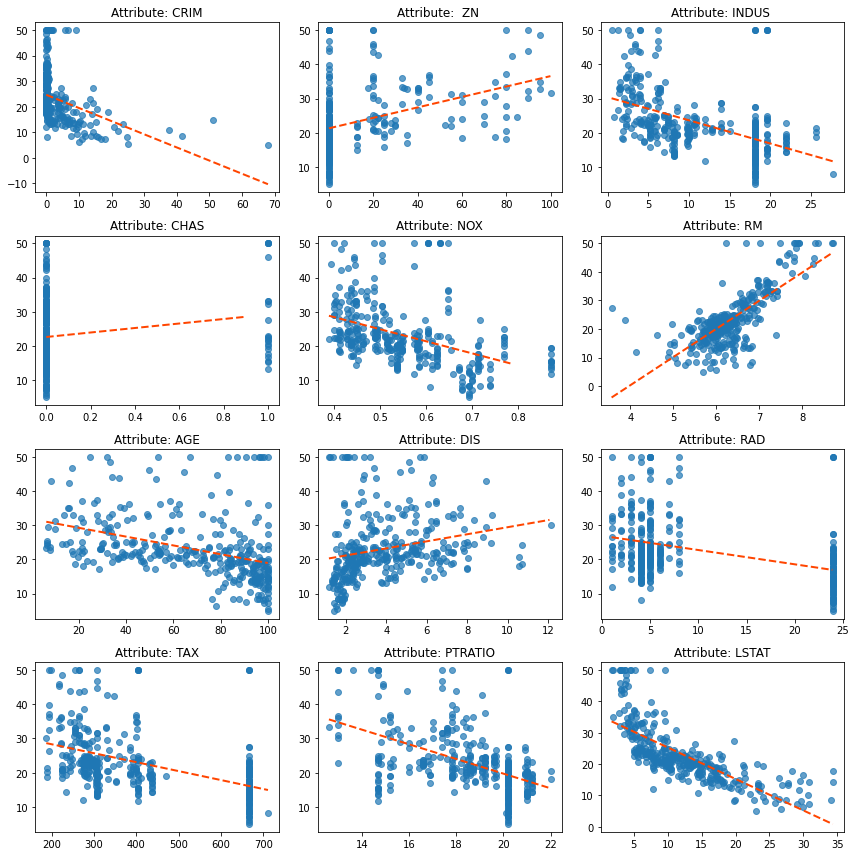

In [39]:
#Defines the number of features in the dataset, excluding the 1s column
num_features = X.shape[1] - 1

plt.figure(figsize=(12, 12))

#Iterate over all features
for i in range(num_features):

  print("Attribute {}".format(i+1))

  #Pick out a the specific feature and the bias column
  X_train_subset = X_train[:, [0, i+1]]
  X_test_subset = X_test[:, [0, i+1]]

  #Checkpoint to make sure the dimensions are correct 
  assert X_train_subset.shape == (X_train.shape[0], 2)

  #Computed least squares solution - In case we encounter singular matrices, I have used the pseudoinverse as backup
  try:
    w = np.linalg.inv(X_train_subset.T @ X_train_subset) @ X_train_subset.T @ Y_train
  except np.linalg.LinAlgError:
    w = np.linalg.pinv(X_train_subset.T @ X_train_subset) @ X_train_subset.T @ Y_train

  #Calculate the train and test MSE for that particular feature/attribute
  train_MSE = MSE(X_train_subset, Y_train, w).item() 
  test_MSE = MSE(X_test_subset, Y_test, w).item()

  print(">> Train MSE = {}".format(train_MSE))
  print(">> Test MSE = {}".format(test_MSE))

  #Define the predicted line of best fit over the data points
  x_points = np.arange(np.min(X_train[:, i+1]), np.max(X_train[:, i+1]), 0.1).reshape(-1, 1)
  y_points = w.squeeze()[1]*x_points + w.squeeze()[0]

  #Plot the data and regression line for each feature, just to see how the model has trained
  plt.subplot(4,3, i+1)
  plt.scatter(X_train[:, i+1], Y_train, alpha=0.7)
  plt.plot(x_points, y_points, color='orangered', linestyle='--', linewidth=2)
  plt.title("Attribute: {}".format(attributes[i]))

plt.tight_layout()
plt.show()

**Over 20 runs**

In [40]:
#For ensuring reproducible results
np.random.seed(199134)

#Stores the number of runs
runs = 20

#Defines the number of features in the dataset, excluding the 1s column
num_features = X.shape[1] - 1

#Initialize empty dictionary
errors_log = dict()

#Iterate over runs
for run in range(runs):

  print("Run {}".format(run+1))

  #Generate a fresh train and test set
  xtrain, ytrain, xtest, ytest = split_data(inputs=X, targets=Y, test_proportion=1/3, shuffle=True)

  #Iterate over the features
  for i in range(num_features):
    #Create a key for the attribute
    key = "Attribute {}".format(i+1)

    #Create the key in errors dictionary if it doesn't exist
    if not key in errors_log.keys():
      errors_log[key] = {"Train MSE":[], "Test MSE":[]}

    #Pick out a the specific feature and the bias column
    xtrain_subset = xtrain[:, [0, i+1]]
    xtest_subset = xtest[:, [0, i+1]]

    #Checkpoint to make sure the dimensions are correct 
    assert xtrain_subset.shape == (xtrain.shape[0], 2)

    #Computed least squares solution - In case we encounter singular matrices, I have used the pseudoinverse as backup
    try:
      w = np.linalg.inv(xtrain_subset.T @ xtrain_subset) @ xtrain_subset.T @ ytrain
    except np.linalg.LinAlgError:
      w = np.linalg.pinv(xtrain_subset.T @ xtrain_subset) @ xtrain_subset.T @ ytrain

    # Calculate the train and test MSE and add it into the errors log
    errors_log[key]["Train MSE"].append(MSE(xtrain_subset, ytrain, w).item())
    errors_log[key]["Test MSE"].append(MSE(xtest_subset, ytest, w).item())

    print(">> Linear regression for {} completed.".format(key))

Run 1
>> Linear regression for Attribute 1 completed.
>> Linear regression for Attribute 2 completed.
>> Linear regression for Attribute 3 completed.
>> Linear regression for Attribute 4 completed.
>> Linear regression for Attribute 5 completed.
>> Linear regression for Attribute 6 completed.
>> Linear regression for Attribute 7 completed.
>> Linear regression for Attribute 8 completed.
>> Linear regression for Attribute 9 completed.
>> Linear regression for Attribute 10 completed.
>> Linear regression for Attribute 11 completed.
>> Linear regression for Attribute 12 completed.
Run 2
>> Linear regression for Attribute 1 completed.
>> Linear regression for Attribute 2 completed.
>> Linear regression for Attribute 3 completed.
>> Linear regression for Attribute 4 completed.
>> Linear regression for Attribute 5 completed.
>> Linear regression for Attribute 6 completed.
>> Linear regression for Attribute 7 completed.
>> Linear regression for Attribute 8 completed.
>> Linear regression for 

In [41]:
#Process the raw errors data dictionary into a clean table with the train and test MSE results for each attribute 
averaged_errors = {"Method": errors_log.keys(),
                   "MSE Train": [np.mean(errors_log[key]["Train MSE"]) for key in errors_log.keys()],
                   "MSE Test": [np.mean(errors_log[key]["Test MSE"]) for key in errors_log.keys()]}

results_table = pd.DataFrame.from_dict(averaged_errors)
results_table

,Method,MSE Train,MSE Test
0,Attribute 1,69.568609,77.953024
1,Attribute 2,72.015690,76.825691
2,Attribute 3,62.422693,69.677222
3,Attribute 4,80.442598,85.280471
4,Attribute 5,67.203539,73.004103
5,Attribute 6,42.845189,45.544419
6,Attribute 7,70.498032,76.720579
7,Attribute 8,77.077643,83.831789
8,Attribute 9,70.034179,76.850144
9,Attribute 10,63.711957,70.728458


#### (d) Linear Regression with all attributes

**Over a single run**

This was just to test over a single run. As we are meant to perform regression over 20 runs, please skip to 20 runs implementation that comes next.

In [42]:
#Split the data into training and test sets. For reproducibility of results I've set a seed
np.random.seed(100000)
X_train, Y_train, X_test, Y_test = split_data(inputs=X, targets=Y, test_proportion=1/3, shuffle=True)

print("Train X shape = {}".format(X_train.shape))
print("Train Y shape = {}".format(Y_train.shape))
print("Test X shape = {}".format(X_test.shape))
print("Test Y shape = {}".format(Y_test.shape))

Train X shape = (337, 13)
Train Y shape = (337, 1)
Test X shape = (169, 13)
Test Y shape = (169, 1)


In [43]:
#Linear regression over all attributes - In case we encounter singular matrices, I've included the pseudoinverse as backup
try:
  W = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ Y_train
except np.linalg.LinAlgError:
  W = np.linalg.pinv(X_train.T @ X_train) @ X_train.T @ Y_train

#Compute training and test error
train_error = MSE(X_train, Y_train, W) 
test_error = MSE(X_test, Y_test, W)

print("Training MSE = {}".format(train_error.item()))
print("Testing MSE = {}".format(test_error.item()))

Training MSE = 19.968355874885134
Testing MSE = 29.34833757420169


**Over 20 runs**

In [44]:
#For reproducibility of results
np.random.seed(10001001)

#Define number of runs
runs = 20

#This will store the total train and test MSE over 20 runs, which we will average later
train_MSE = 0
test_MSE = 0

for i in range(runs):
  #Generate fresh train and test sets
  xtrain, ytrain, xtest, ytest = split_data(inputs=X, targets=Y, test_proportion=1/3, shuffle=True)

  #Compute weights using least squares regression- In case we encounter singular matrices, I've used the pseudoinverse as backup
  try:
    W = np.linalg.inv(xtrain.T @ xtrain) @ xtrain.T @ ytrain
  except np.linalg.LinAlgError:
    W = np.linalg.pinv(xtrain.T @ xtrain) @ ytrain.T @ ytrain

  #Checkpoint to ensure the weight dimensions are correct
  assert W.shape == (xtrain.shape[1], 1)

  #Compute train and test error
  train_MSE += MSE(xtrain, ytrain, W)
  test_MSE += MSE(xtest, ytest, W)

  print(">> Run {} Completed.".format(i+1))

print("Average Train MSE (Computed over {} runs) = {}".format(runs, train_MSE.item()/runs))
print("Average Test MSE (Computed over {} runs) = {}".format(runs, test_MSE.item()/runs))

>> Run 1 Completed.
>> Run 2 Completed.
>> Run 3 Completed.
>> Run 4 Completed.
>> Run 5 Completed.
>> Run 6 Completed.
>> Run 7 Completed.
>> Run 8 Completed.
>> Run 9 Completed.
>> Run 10 Completed.
>> Run 11 Completed.
>> Run 12 Completed.
>> Run 13 Completed.
>> Run 14 Completed.
>> Run 15 Completed.
>> Run 16 Completed.
>> Run 17 Completed.
>> Run 18 Completed.
>> Run 19 Completed.
>> Run 20 Completed.
Average Train MSE (Computed over 20 runs) = 21.414764727427052
Average Test MSE (Computed over 20 runs) = 25.922665880997403


## **Section 1.3** : Kernelized Ridge Regression

### Question 5

#### (a) Performing kernel ridge regression using different kernel parameters

In [45]:
def gaussian_kernel_matrix(X, sigma):
  """
  Computes the gaussian kernel matrix on a given set of vectors.
  
  Args
  ----
  X : NumPy array of data. Should be of shape (l, n) where l is number of examples and n is number of features
  sigma : sigma value of Gaussian kernel.

  Returns
  -------
  K : a symmetric positive definite matrix of shape (l, l)
  """

  #Number of samples
  l = X.shape[0]

  # Extract the diagonals of XX^T into a vector and stack it l times into lxl matrix B
  inner_product_vector = np.diagonal(X@X.T).reshape(-1, 1)

  #Compute matrix of just the dot products between x_i and x_j
  inner_product_matrix = inner_product_vector - 2 * (X@X.T) + inner_product_vector.T

  #Compute gaussian kernel matrix
  K = np.exp((-1/(2*sigma**2)) * inner_product_matrix)

  #Checkpoint to ensure matrix K is correct dimensions
  assert K.shape == (l, l), "K matrix should be of shape ({}, {})".format(l, l)

  return K

In [46]:
def kernel_ridge_regression(X, y, sigma, gamma):
  """ 
  Compute the solution alpha* for kernelized ridge regression.

  Args
  ----
  X : NumPy array of data. Should be of shape (l, n) where l is number of examples and n is number of input features
  y : NumPy array of target outputs. Should be of shape (l, 1)
  sigma : sigma value for Gaussian kernel
  gamma : regularization parameter for ridge regression

  Returns
  -------
  alpha_star : (l, 1) vector which represents the dual solution for ridge regression.
  
  """

  #Extract number of samples
  l = X.shape[0]

  #Compute kernel
  K = gaussian_kernel_matrix(X, sigma) #kernel_matrix(X, X, sigma=sigma)

  #Create identity matrix used in the formula
  I = np.eye(l)

  #Compute alpha_star value using formula
  try:
    alpha_star = np.linalg.inv(K + gamma*l*I) @ y
  except np.linalg.LinAlgError:
    alpha_star = np.linalg.pinv(K + gamma*l*I) @ y

  #Checkpoint to ensure the alpha is correct dimensions
  assert alpha_star.shape == (l, 1), "Alpha star should be of shape ({}, {})".format(l, 1)

  return alpha_star

In [47]:
def evaluate(alpha, X_tr, X_te, sigma):
  """
  Vectorized implementation of kernel ridge regression evaluation function on a test point.

  Args
  ----
  alpha : NumPy array of the dual solution alpha. Should be of shape (l, 1) where l is the number of training examples.
  X_tr : NumPy array of the training set inputs. Should be of shape (l, n)
  X_te : NumPy array of the test set inputs. Should be of shape (m, n) where m is number of test examples.
  sigma : Sigma value of the Gaussian kernel.

  Returns
  -------
  pred : NumPy array of predictions for the test data. Should be of shape (m, 1)
  """

  #Extract dimensions of data
  l = X_tr.shape[0]
  m = X_te.shape[0]

  #Evaluate regression model at all test points
  inner_product_matrix = np.diagonal(X_tr@X_tr.T).reshape(1, -1) - 2 * (X_te @ X_tr.T) + np.diagonal(X_te@X_te.T).reshape(-1, 1) 
  K = np.exp((-1/(2*sigma**2)) * inner_product_matrix)
  pred = K @ alpha

  assert pred.shape == (m, 1), "Predictions should be of shape ({}, 1)".format(m, 1)

  return pred

In [48]:
def train_with_kfoldCV(k, data, kernel_params, shuffle=True, verbose=True):
  """
  Performs k-fold cross validation on a given dataset.

  Args
  ----
  k - number of folds of cross-validation
  data - tuple of training input and output data. Training input must be NumPy array of shape (# examples, # features) while output must be of shape (# examples, 1)
  kernel_params - tuple of (sigma, gamma) parameters for computing the Gaussian kernel.
  shuffle - If True, then data is shuffled
  seed - to ensure reproducible results
  verbose - Set to True if you wish to see printed notifications.

  Returns
  -------
  cv_error - the validation set error averaged over the k folds of cross validation for the specified kernel parameters
  """

  #Extract data
  x, y = data

  #Extract gaussian kernel params
  sigma, gamma = kernel_params

  #Extract dimensions
  nSamples, nFeatures = x.shape

  #Shuffle dataset randomly
  if shuffle:
    perm = np.random.permutation(nSamples)
    x_shuffled = x[perm, :]
    y_shuffled = y[perm, :]
  else:
    x_shuffled = x
    y_shuffled = y

  # print("X_shuffled = ", x_shuffled)

  #Split data into k-groups
  x_groups = np.array_split(x_shuffled, k)
  y_groups = np.array_split(y_shuffled, k)

  #Stores the cross validation MSE which is the MSE calculated over the validation sets generated during each fold of k-fold CV
  cv_mse = 0

  #Iterate over each cross-validation group
  for i in range(len(x_groups)):

    #Use the selected group as "validation" set
    val_inputs, val_outputs = x_groups[i], y_groups[i]

    #Use rest of groups as training set
    train_inputs = np.vstack([x_groups[j] for j in range(len(x_groups)) if j != i]) 
    train_outputs = np.vstack([y_groups[j] for j in range(len(x_groups)) if j != i])
    
    #Fit model on train set
    alpha_star = kernel_ridge_regression(X=train_inputs, y=train_outputs, sigma=sigma, gamma=gamma)

    #Generate predictions on "validation" set
    val_predictions = evaluate(alpha=alpha_star, X_tr=train_inputs, X_te=val_inputs, sigma=sigma)

    #Compute validation errors
    cv_mse += (1/len(val_outputs)) * (val_outputs - val_predictions).T @ (val_outputs - val_predictions)
    if verbose:
      print(">> Cross-validation Fold {} Completed.".format(i+1))

  #Average the errors
  cv_error = cv_mse.item() / k

  if verbose:
    print(">> MEAN CROSS-VALIDATION ERROR = {}\n".format(cv_error))

  #Summarize performance using sample of model eval scores
  return cv_error

In [49]:
#Create parameter space
sigma_values = 2**np.arange(7, 13.5, 0.5)
gamma_values = (2**np.arange(40.0, 25.0, -1))**-1

#Represent all (sigma, gamma) pairs using meshgrid. This will be helpful when creating the 3D plot
gamma_array, sigma_array = np.meshgrid(gamma_values, sigma_values)

#This grid will store the cross validation error values
errors = np.zeros((sigma_values.shape[0], gamma_values.shape[0]))

#Split data into train and test set - for reproducibility, I've set a seed
np.random.seed(100000)
X_train, Y_train, X_test, Y_test = split_data(inputs=X[:, 1:], targets=Y, test_proportion=1/3, shuffle=True)
train_data = (X_train, Y_train)

print("Train X shape = {}".format(X_train.shape))
print("Train Y shape = {}".format(Y_train.shape))
print("Test X shape = {}".format(X_test.shape))
print("Test Y shape = {}".format(Y_test.shape))

Train X shape = (337, 12)
Train Y shape = (337, 1)
Test X shape = (169, 12)
Test Y shape = (169, 1)


In [50]:
#Train the model for all the different values of sigma and gamma
for i in range(errors.shape[0]):
  for j in range(errors.shape[1]):

    #Create the sigma and gamma pair
    sigma = sigma_values[i]
    gamma = gamma_values[j]

    print("Sigma = {}, Gamma = {}".format(sigma, gamma))

    #Perform 5-fold cross validation. Note - Because we are adding a shuffle operation inside crossval function, every pair of sigma and gamma may train on different examples
    #To ensure that each (sigma, gamma) pair is used on the same set of training and test examples on each fold, I've seed a seed
    np.random.seed(130399)
    cv_error = train_with_kfoldCV(k=5, data=train_data, kernel_params=(sigma, gamma), shuffle=True, verbose=True)
    
    #Add this error value into our errors matrix
    errors[i, j] = cv_error

print("Ridge Regression Completed!")

Sigma = 128.0, Gamma = 9.094947017729282e-13
>> Cross-validation Fold 1 Completed.
>> Cross-validation Fold 2 Completed.
>> Cross-validation Fold 3 Completed.
>> Cross-validation Fold 4 Completed.
>> Cross-validation Fold 5 Completed.
>> MEAN CROSS-VALIDATION ERROR = 1140.1129947412096

Sigma = 128.0, Gamma = 1.8189894035458565e-12
>> Cross-validation Fold 1 Completed.
>> Cross-validation Fold 2 Completed.
>> Cross-validation Fold 3 Completed.
>> Cross-validation Fold 4 Completed.
>> Cross-validation Fold 5 Completed.
>> MEAN CROSS-VALIDATION ERROR = 1027.3711938960896

Sigma = 128.0, Gamma = 3.637978807091713e-12
>> Cross-validation Fold 1 Completed.
>> Cross-validation Fold 2 Completed.
>> Cross-validation Fold 3 Completed.
>> Cross-validation Fold 4 Completed.
>> Cross-validation Fold 5 Completed.
>> MEAN CROSS-VALIDATION ERROR = 866.3310852646434

Sigma = 128.0, Gamma = 7.275957614183426e-12
>> Cross-validation Fold 1 Completed.
>> Cross-validation Fold 2 Completed.
>> Cross-valida

#### (b) Plot Cross-Validation error over $\sigma$ and $\gamma$ values

In [51]:
#Import 3D plotting tools
from mpl_toolkits import mplot3d

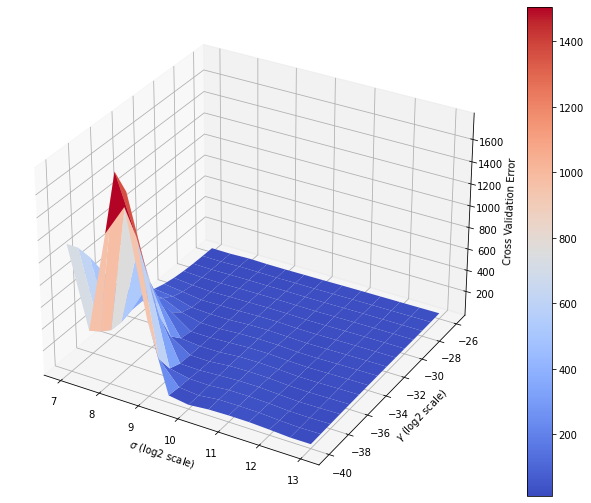

In [69]:
fig = plt.figure(figsize=(11, 9))
ax = plt.axes(projection='3d')

#Data for 3d graph
x_values = np.ravel(np.log2(sigma_array))
y_values = np.ravel(np.log2(gamma_array))
z_values = np.ravel(errors)

#Plot cv error
ax.set_xlabel("$\sigma$ (log2 scale)")
ax.set_ylabel("$\gamma$ (log2 scale)")
ax.set_zlabel("Cross Validation Error")
# ax.scatter3D(x_values, y_values, z_values)
p = ax.plot_surface(np.log2(sigma_array), np.log2(gamma_array), errors, cmap=plt.cm.coolwarm)
fig.colorbar(p)
plt.savefig('cross_val_error.png')

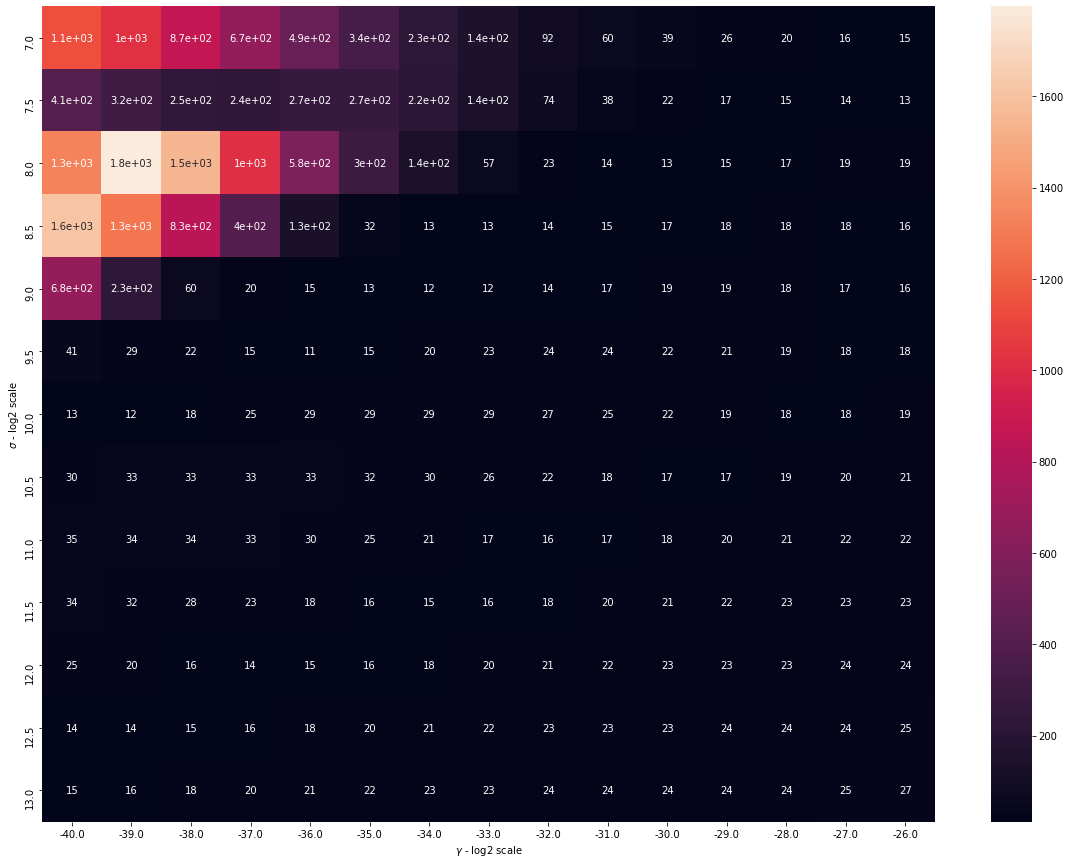

In [53]:
#Plot as annotated heatmap
plt.figure(figsize=(20, 15))
ax = sns.heatmap(errors, xticklabels=np.log2(gamma_values), yticklabels=np.log2(sigma_values), annot=True)
plt.ylabel("$\sigma$ - log2 scale")
plt.xlabel("$\gamma$ - log2 scale")
plt.savefig("annotated_heatmap.png")

#### (c) Calculate MSE on training and test sets for best $\gamma$ and $\sigma$

In [54]:
smallest_error = np.argmin(errors)
best_sigma = np.ravel(sigma_array)[smallest_error]
best_gamma = np.ravel(gamma_array)[smallest_error]
print("Best gamma value = {}".format(best_gamma))
print("Best sigma value = {}".format(best_sigma))

Best gamma value = 1.4551915228366852e-11
Best sigma value = 724.0773439350247


In [55]:
np.log2(best_sigma), np.log2(best_gamma)

(9.5, -36.0)

In [56]:
#Perform ridge regression on training set using best sigma and gamma
alpha = kernel_ridge_regression(X=X_train, y=Y_train, sigma=best_sigma, gamma=best_gamma)

#Compute predictions on train set: The "test" points here are just the training set again
Y_train_pred = evaluate(alpha=alpha, X_tr=X_train, X_te=X_train, sigma=best_sigma) 
#Compute predictions on test set
Y_test_pred = evaluate(alpha=alpha, X_tr=X_train, X_te=X_test, sigma=best_sigma)

#Compute MSE for train and test sets
MSE_train = (1/len(Y_train)) * ((Y_train_pred - Y_train).T @ (Y_train_pred - Y_train)).item()
MSE_test = (1/len(Y_test)) * ((Y_test_pred - Y_test).T @ (Y_test_pred - Y_test)).item()

print("Train MSE on best gamma and sigma = {}".format(MSE_train))
print("Test MSE on best gamma and sigma = {}".format(MSE_test))

Train MSE on best gamma and sigma = 5.035037875678537
Test MSE on best gamma and sigma = 16.47934854432636


#### (d) Repeat Regression experiments over 20 random splits

In [57]:
def naive_regression_eval(num_train_samples, num_test_samples, train_y, test_y, results_dict):
  """ 
  Performs Naive Regression on given data and saves results.
  
  Args
  ----
  num_train_samples : number of training samples. This will be used to create a ones vector for the training set.
  num_test_samples : number of testing samples. This will be used to create a ones vector for the testing set.
  train_y : NumPy array of training output values. Should be of shape (num_train_samples, 1)
  test_y : NumPy array of testing output values. Should be of shape (num_test_samples, 1)
  results_dict : Dictionary in which to save the results.

  Returns
  -------
  None.

  """

  #Add the key into the results dictionary
  key = "Naive Regression"
  if not key in results_dict.keys():
    results_dict[key] = {"Train MSE":[], "Test MSE": []}

  #Create a ones vector for train and test data
  train_ones = np.ones((num_train_samples, 1))
  test_ones = np.ones((num_test_samples, 1))

  #Compute the weights using training set - in case we encounter singular matrices, Ive added the psuedoinverse as backup
  try:
    w = np.linalg.inv(train_ones.T @ train_ones) @ train_ones.T @ train_y
  except np.linalg.LinAlgError:
    w = np.linalg.pinv(train_ones.T @ train_ones) @ train_ones.T @ train_y

  #Add results into the dictionary
  results_dict[key]["Train MSE"].append(MSE(train_ones, train_y, w).item())
  results_dict[key]["Test MSE"].append(MSE(test_ones, test_y, w).item())

  print(">> Naive Regression done.")

In [58]:
def linear_regression_eval(train_x, test_x, train_y, test_y, results_dict, single=False):
  """
  Performs linear regression on the given data and saves results.

  Args
  ----
  train_x : NumPy array of training inputs. Should be of shape (m, n) where m is number of training examples and n is number of input features
  test_x : NumPy array of test inputs. Should be of shape (l, n) where l is number of testing examples and n is number of input features
  train_y : NumPy array of training outputs. Should be of shape (m, 1) where m is number of training examples
  test_y : NumPy array of testing inputs. Should be of shape (l, 1) where l is number of training examples
  results_dict : Dictionary in which to save the results.
  single : Set to True if you wish to perform on single attributes.

  Returns
  -------
  None.
  """

  if single:
    num_features = train_x.shape[1] - 1

    #Iterate over the features
    for i in range(num_features):
      #Create a key for the attribute and add it into the results dictionary if it doesn't exist
      key = "attribute {}".format(i+1)
      if not key in results_dict.keys():
        results_dict[key] = {"Train MSE": [], "Test MSE": []}

      #Pick out a the specific feature and the bias column
      train_x_subset = train_x[:, [0, i+1]]
      test_x_subset = test_x[:, [0, i+1]]

      #Checkpoint to make sure the dimensions are correct 
      assert train_x_subset.shape == (train_x.shape[0], 2)

      #Computed least squares solution - In case we encounter singular matrices, I have used the pseudoinverse as backup
      try:
        w = np.linalg.inv(train_x_subset.T @ train_x_subset) @ train_x_subset.T @ train_y
      except np.linalg.LinAlgError:
        w = np.linalg.pinv(train_x_subset.T @ train_x_subset) @ train_x_subset.T @ train_y

      # Compute the train and test MSE and add it into the results_dict
      results_dict[key]["Train MSE"].append(MSE(train_x_subset, train_y, w).item())
      results_dict[key]["Test MSE"].append(MSE(test_x_subset, test_y, w).item())

      print(">> Linear regression for {} done.".format(key))
    
  else:
    #Create a key for the attribute and add it into the results dictionary if it doesn't exist
    key = "all attributes"
    if not key in results_dict.keys():
      results_dict[key] = {"Train MSE": [], "Test MSE": []}

    #Compute the weights using training set - in case we encounter singular matrices, Ive added the psuedoinverse as backup
    try:
      w = np.linalg.inv(train_x.T @ train_x) @ train_x.T @ train_y
    except np.linalg.LinAlgError:
      w = np.linalg.pinv(train_x.T @ train_x) @ train_x.T @ train_y

    #Compute the train and test MSE and add it into the results dictionary
    results_dict[key]["Train MSE"].append(MSE(train_x, train_y, w).item()) 
    results_dict[key]["Test MSE"].append(MSE(test_x, test_y, w).item())

    print(">> Linear Regression for {} done.".format(key))

In [59]:
def ridge_regression_eval(train_x, train_y, test_x, test_y, sigma_values, gamma_values, results_dict):
  """
  Performs kernelized ridge regression on the given data and saves results.

  Args
  ----
  train_x : NumPy array of training inputs. Should be of shape (m, n) where m is number of training examples and n is number of input features
  test_x : NumPy array of test inputs. Should be of shape (l, n) where l is number of testing examples and n is number of input features
  train_y : NumPy array of training outputs. Should be of shape (m, 1) where m is number of training examples
  test_y : NumPy array of testing inputs. Should be of shape (l, 1) where l is number of training examples
  sigma_values : NumPy 1D array of possible sigma values.
  gamma_values : NumPY 1D array of possible gamma values.

  Returns
  -------
  None.
  """

  #Generate a seed value which we will use inside the for loop.
  seed=np.random.randint(100)

  #Create a key for the attribute and add it into the results dictionary if it doesn't exist
  key = "Kernel Ridge Regression"
  if not key in results_dict.keys():
    results_dict[key] = {"Train MSE": [], "Test MSE": []}

  #The best parameters will be saved in the order [best_sigma, best_gamma]
  best_parameters = {"sigma":0, "gamma":0}

  #Initialize the smallest error to be some large number. This will be used to update our best parameters
  min_error = 10000000000000000000

  #Iterate over entire parameter space
  for i in range(len(sigma_values)):
    for j in range(len(gamma_values)):

      #Create the sigma and gamma pair
      sigma = sigma_values[i]
      gamma = gamma_values[j]

      #Perform 5-fold cross validation. 
      # Note - The train_with_kfoldCV() function performs a kfoldCV for just one sigma and gamma.
      # In the function, I've added a shuffle operation BEFORE splitting the data into the k groups.
      # This means that everytime we use a new sigma and gamma, the group compositions may differ due to the shuffle.
      # We need to ensure that the group compositions after shuffling are the same everytime so that our parameters sigma and gamma are comparable.
      np.random.seed(seed)
      mean_cv_error = train_with_kfoldCV(k=5, data=(train_x, train_y), kernel_params=(sigma, gamma), shuffle=True, verbose=False)

      #If the mean_cv_error is smaller than the minimum error, then we can update our best parameters
      if mean_cv_error < min_error:
        min_error = mean_cv_error
        best_parameters['sigma'] = sigma
        best_parameters['gamma'] = gamma

  #Compute dual regression solution using training set
  alpha_star = kernel_ridge_regression(X=train_x, y=train_y, sigma=best_parameters['sigma'], gamma=best_parameters['gamma'])

  #Compute predictions on train set: The "test" points here are just the training set again
  train_y_pred = evaluate(alpha=alpha_star, X_tr=train_x, X_te=train_x, sigma=best_parameters['sigma']) 
  #Compute predictions on test set
  test_y_pred = evaluate(alpha=alpha_star, X_tr=train_x, X_te=test_x, sigma=best_parameters['sigma'])

  #Compute train and test MSE
  train_MSE = (1/len(train_y)) * (train_y_pred - train_y).T @ (train_y_pred - train_y)
  test_MSE = (1/len(test_y)) * (test_y_pred - test_y).T @ (test_y_pred - test_y)

  results_dict[key]["Train MSE"].append(train_MSE)
  results_dict[key]["Test MSE"].append(test_MSE)

  print(">> Kernel Ridge Regression done.\n")

In [60]:
#Initialize a final results dictionary which we shall update with all the errors
final_results = dict()

#Store number of runs here
runs = 20

#Generate a seed for reproducible results
np.random.seed(1753295)

#PROBLEM: INSPITE OF SETTING SEED HERE, THE FUNCTION IS GENERATING SAME TRAINING SET EVERYTIME!! HOW TO FIX IT?

#Iterate over runs
for i in range(runs):

  print("Run {}".format(i+1))

  #Generate a fresh batch of train/test data
  train_X, train_Y, test_X, test_Y = split_data(inputs=X, targets=Y, test_proportion=1/3, shuffle=True)
  # print("Training set = ", train_X)

  #PERFORM NAIVE REGRESSION AND UPDATE RESULTS
  naive_regression_eval(num_train_samples=len(train_X), num_test_samples=len(test_X), train_y=train_Y, test_y=test_Y, results_dict=final_results)

  #PERFORM LINEAR REGRESSION ON SINGLE ATTRIBUTES AND UPDATE RESULTS
  linear_regression_eval(train_x=train_X, test_x=test_X, train_y=train_Y, test_y=test_Y, results_dict=final_results, single=True)

  #PERFORM LINEAR REGRESSION ON ALL ATTRIBUTES AND UPDATE RESULTS
  linear_regression_eval(train_x=train_X, test_x=test_X, train_y=train_Y, test_y=test_Y, results_dict=final_results, single=False)

  #PERFORM KERNELIZED RIDGE REGRESSION ON ALL ATTRIBUTES AND UPDATE RESULTS
  #Create parameter space
  sigma_values = 2**np.arange(7, 13.5, 0.5)
  gamma_values = (2**np.arange(40.0, 25.0, -1))**-1
  # sigma_values = 2**np.arange(7, 8.0, 0.5)
  # gamma_values = (2**np.arange(40.0, 38.0, -1))**-1
  ridge_regression_eval(train_x=train_X[:, 1:], train_y=train_Y,
                        test_x=test_X[:, 1:], test_y=test_Y,
                        sigma_values=sigma_values,
                        gamma_values=gamma_values,
                        results_dict=final_results)

print("Evaluation Completed.")

Run 1
>> Naive Regression done.
>> Linear regression for attribute 1 done.
>> Linear regression for attribute 2 done.
>> Linear regression for attribute 3 done.
>> Linear regression for attribute 4 done.
>> Linear regression for attribute 5 done.
>> Linear regression for attribute 6 done.
>> Linear regression for attribute 7 done.
>> Linear regression for attribute 8 done.
>> Linear regression for attribute 9 done.
>> Linear regression for attribute 10 done.
>> Linear regression for attribute 11 done.
>> Linear regression for attribute 12 done.
>> Linear Regression for all attributes done.
>> Kernel Ridge Regression done.

Run 2
>> Naive Regression done.
>> Linear regression for attribute 1 done.
>> Linear regression for attribute 2 done.
>> Linear regression for attribute 3 done.
>> Linear regression for attribute 4 done.
>> Linear regression for attribute 5 done.
>> Linear regression for attribute 6 done.
>> Linear regression for attribute 7 done.
>> Linear regression for attribute 8

In [61]:
train_mse_averages = ["{:.3f} +/- {:.3f}".format(np.mean(final_results[key]['Train MSE']), np.std(final_results[key]['Train MSE'])) for key in final_results.keys()]
test_mse_averages = ["{:.3f} +/- {:.3f}".format(np.mean(final_results[key]['Test MSE']), np.std(final_results[key]['Test MSE'])) for key in final_results.keys()]

processed_results = {"Method": final_results.keys(),
                     "MSE Train":train_mse_averages,
                     "MSE Test":test_mse_averages
                     }

results_table = pd.DataFrame.from_dict(processed_results)
results_table

,Method,MSE Train,MSE Test
0,Naive Regression,83.517 +/- 3.055,86.421 +/- 6.143
1,attribute 1,69.581 +/- 2.623,77.042 +/- 5.180
2,attribute 2,72.068 +/- 3.240,76.581 +/- 6.554
3,attribute 3,63.221 +/- 3.033,67.842 +/- 6.147
4,attribute 4,81.172 +/- 3.244,84.269 +/- 6.907
5,attribute 5,67.346 +/- 3.129,72.556 +/- 6.382
6,attribute 6,44.215 +/- 2.740,42.725 +/- 5.437
7,attribute 7,70.518 +/- 3.365,76.685 +/- 6.933
8,attribute 8,77.569 +/- 3.298,82.644 +/- 6.792
9,attribute 9,70.002 +/- 3.143,76.719 +/- 6.460


## Old Code

In [63]:
# def gaussian_kernel(x_i, x_j, sigma):
#   kernel = np.exp((-1/2*sigma**2) * np.linalg.norm(x_i - x_j)**2)
#   return kernel

# def kernel_matrix(X1, X2, sigma):
#   K_matrix = np.zeros((X1.shape[0], X2.shape[0]))
#   for i in range(K_matrix.shape[0]):
#     for j in range(K_matrix.shape[1]):
#       K_matrix[i, j] = gaussian_kernel(X1[i, :], X2[j, :], sigma)
#   return K_matrix

# def evaluate(alpha, train_points, test_points, sigma):

#   l = train_points.shape[0]

#   y_pred = np.zeros((test_points.shape[0], 1))

#   for i in range(y_pred.shape[0]):
#     test_point = test_points[i, :].reshape(-1, 1)
#     y_pred[i, :] = alpha.T @ gaussian_kernel(train_points.T, test_point, sigma)

#   return y_pred